# **Business Problem**

**Contex**\
Bike sharing system adalah metode yang baru dari rental sepeda traditional dimana keseluruhan proses mulai dari membership, rental, dan pengembalian dibuat secara otomatis. Melalui system ini, seorang user dapat dengan melakukan peminjaman dengan lebih mudah dari suatu tempat dan mengembalikannya di tempat yang berbeda.\
\
**Problem Statement**\
Dalam hal bisnis, keberlangsungan perusahaan salah satunya bergantung pada customer yang melakukan transaksi. Oleh karena itu, perlu diperhatikan beberapa aspek yang mempengaruhi minat customer untuk melakukan transaksi.

**Import Data dan Cek Info**

In [1]:
# Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math

from scipy.stats import chi2_contingency

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, recall_score

from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE,ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'category_encoders'

** Load Data dan Explorasi Data**

In [4]:
# Load Data

bike = pd.read_csv('data_bike_sharing.csv')
bike

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


In [3]:
# Cek info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
# Konversi dteday ke datetime

bike['dteday'] = pd.to_datetime(bike['dteday'], format='%Y-%m-%d')

In [12]:
# Menambahkan kolom month

bike['month'] = bike['dteday'].dt.month
cols = ['dteday', 'month'] + [col for col in bike.columns if col not in ['dteday', 'month']]
bike = bike[cols]

In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   month       12165 non-null  int32         
 2   hum         12165 non-null  float64       
 3   weathersit  12165 non-null  int64         
 4   holiday     12165 non-null  int64         
 5   season      12165 non-null  int64         
 6   atemp       12165 non-null  float64       
 7   temp        12165 non-null  float64       
 8   hr          12165 non-null  int64         
 9   casual      12165 non-null  int64         
 10  registered  12165 non-null  int64         
 11  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(7)
memory usage: 1.1 MB


In [17]:
# Cek data duplikasi dan Missing Value

duplicates = bike[bike.duplicated()]
duplicate_count = bike.duplicated().sum()

nan_count = bike.isnull().sum()

print(f"Jumlah baris duplikat: {duplicate_count} dan jumlah missing value :{nan_count}")

Jumlah baris duplikat: 0 dan jumlah missing value :dteday        0
month         0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64


Tidak ditemukan duplikasi data dan missing value

<Figure size 1500x800 with 0 Axes>

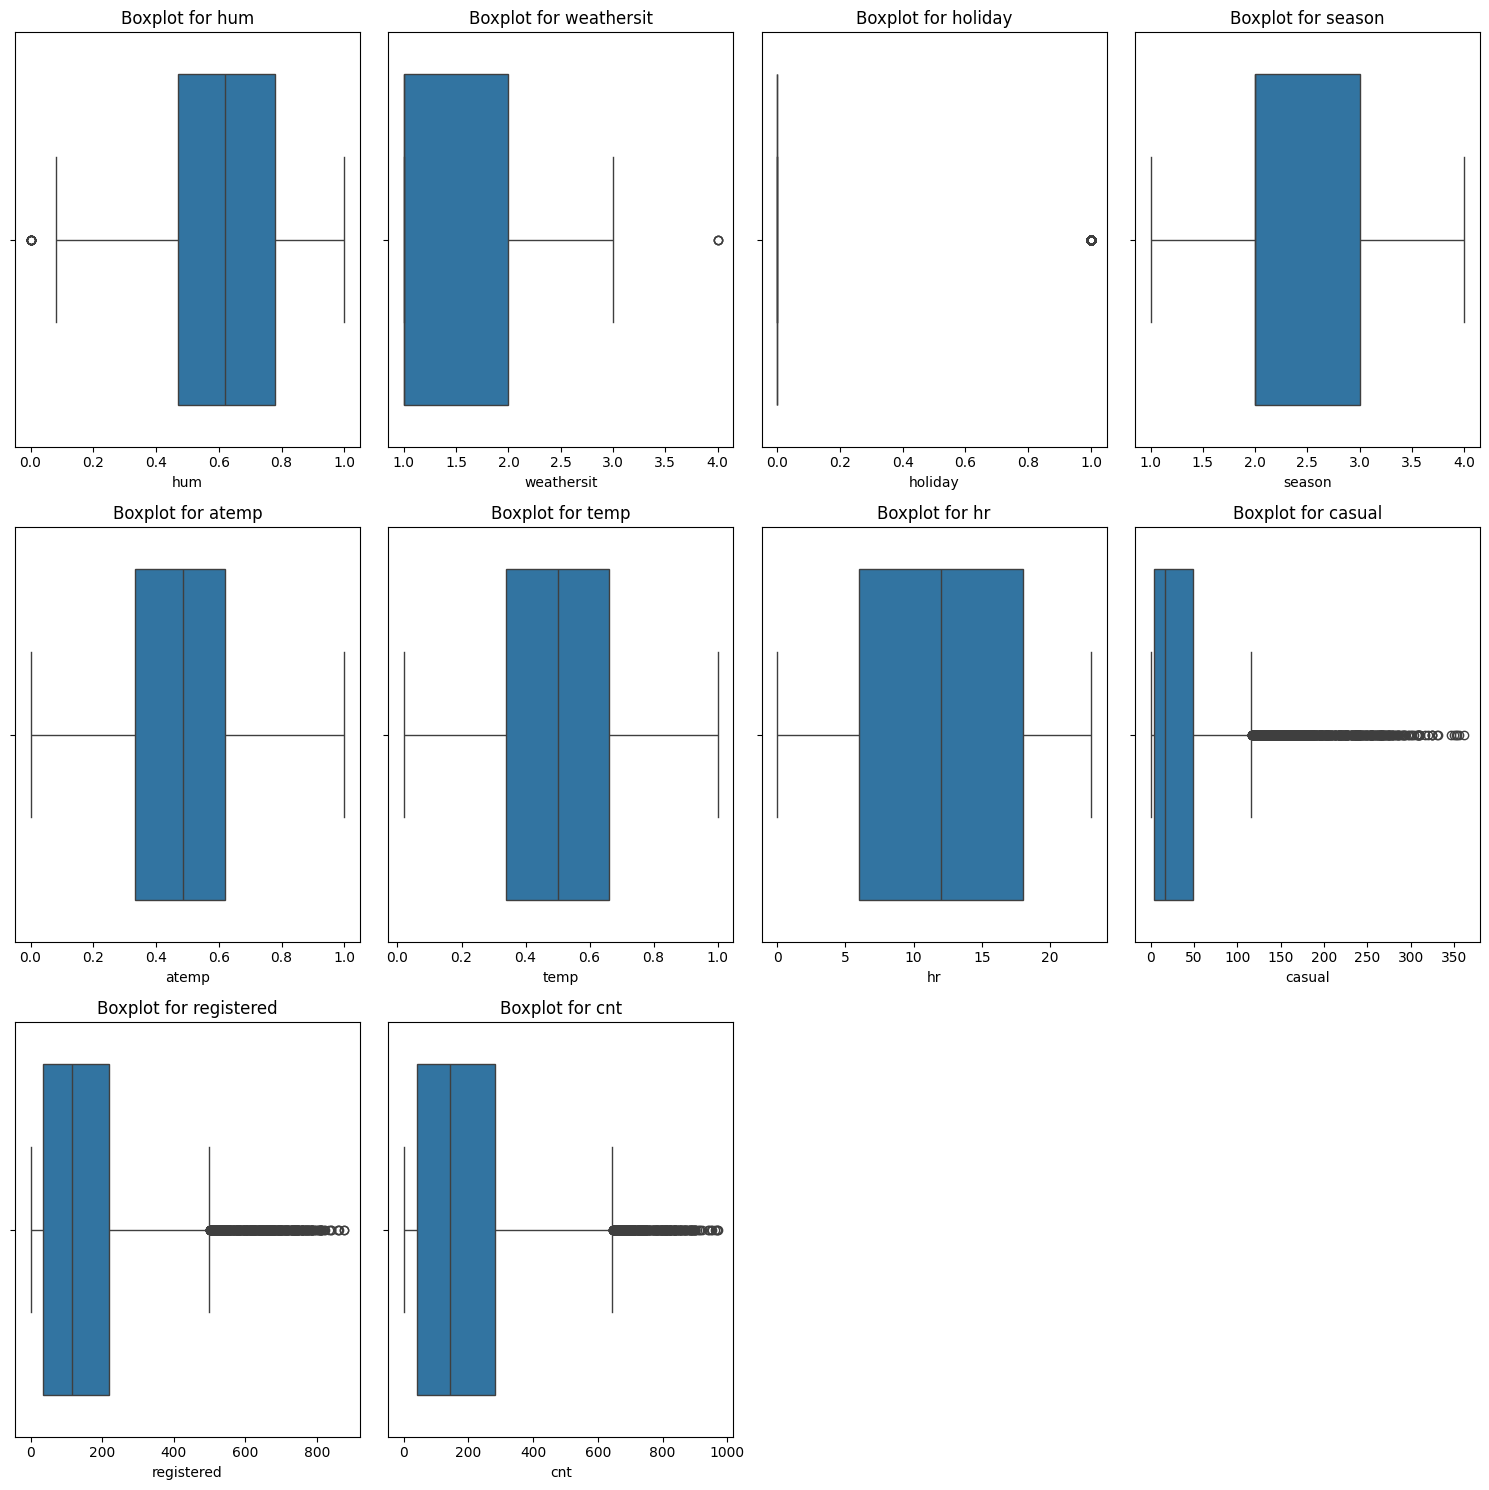

In [21]:
# Cek Outlier

plt.figure(figsize=(15, 8))

num_columns = len(bike.select_dtypes(include=['float64', 'int64']).columns)
num_rows = math.ceil(num_columns / 4)
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(bike.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(num_rows, 4, i+1)
    sns.boxplot(x=bike[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

Berdasarkan boxplot di atas, terlihat bahwa terdapat outlier pada :
- humidity (outlier 0 dan dapat dikatakan data tidak relevan)
- weathersit
- holiday
- casual
- registered
- cnt

In [28]:
# Menghapus data tidak relevan

bike = bike.drop(bike[bike['hum'] == 0].index)
print(bike['hum'].unique())

[0.62 0.64 0.53 0.87 0.55 0.72 0.54 0.93 1.   0.24 0.78 0.6  0.38 0.52
 0.8  0.37 0.3  0.83 0.94 0.61 0.73 0.35 0.41 0.74 0.49 0.33 0.44 0.77
 0.89 0.88 0.66 0.7  0.71 0.63 0.57 0.43 0.39 0.45 0.48 0.5  0.34 0.19
 0.36 0.65 0.81 0.79 0.27 0.29 0.67 0.75 0.76 0.31 0.4  0.28 0.69 0.08
 0.32 0.51 0.46 0.59 0.58 0.23 0.84 0.82 0.47 0.18 0.25 0.42 0.86 0.68
 0.56 0.16 0.21 0.97 0.85 0.26 0.22 0.2  0.17 0.1  0.15 0.13 0.9  0.92
 0.96 0.91 0.12 0.14]


Data tidak relevan sudah terhapus

In [36]:
daily_transactions = bike.groupby('dteday').size()
daily_transactions

dteday
2011-01-01    15
2011-01-02    15
2011-01-03    16
2011-01-04    18
2011-01-05    20
              ..
2012-12-27    19
2012-12-28    17
2012-12-29    19
2012-12-30    13
2012-12-31    13
Length: 730, dtype: int64

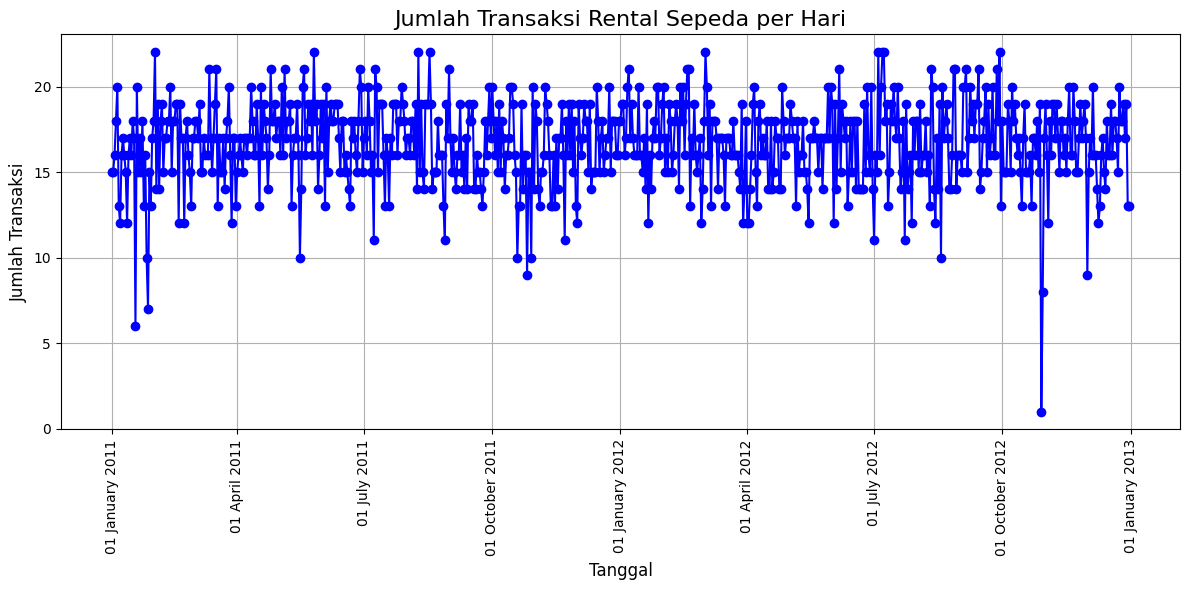

In [48]:
# Grafik Rental Sepeda Per Hari
import matplotlib.dates as mdates

daily_transactions = bike.groupby('dteday').size()

plt.figure(figsize=(12,6))  
plt.plot(daily_transactions.index, daily_transactions.values, marker='o', linestyle='-', color='b') 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %B %Y'))
plt.title('Jumlah Transaksi Rental Sepeda per Hari', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(rotation=90)  
plt.grid(True)  
plt.tight_layout()  
plt.show()

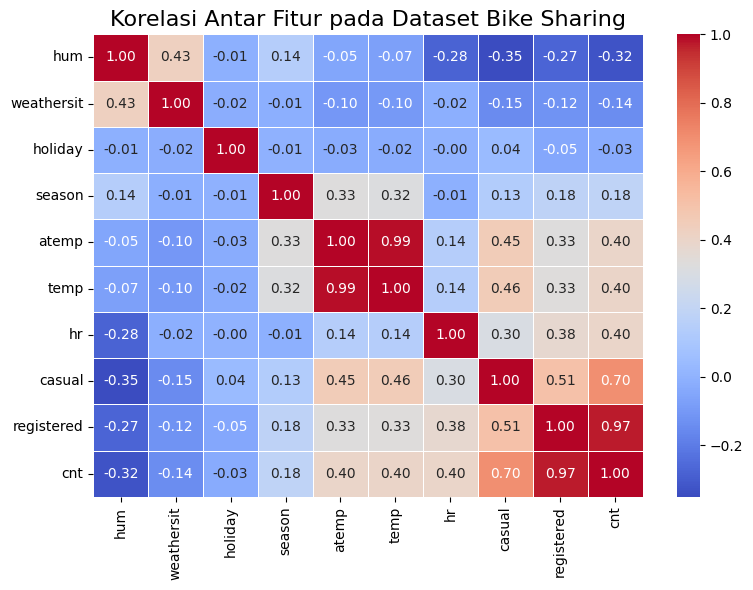

In [50]:
# Cek Korelasi Heat Map

bike_numeric = bike.select_dtypes(include=['float64', 'int64'])
correlation_matrix = bike_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Fitur pada Dataset Bike Sharing', fontsize=16)
plt.tight_layout()
plt.show()

Berdasarkan heatmap di atas, beberapa aspek yang berpengaruh pada minat rental antara lain:
- registered
- casual
- hr
- temp
- atemp
- season

Text(0, 0.5, 'Jumlah Transaksi (cnt)')

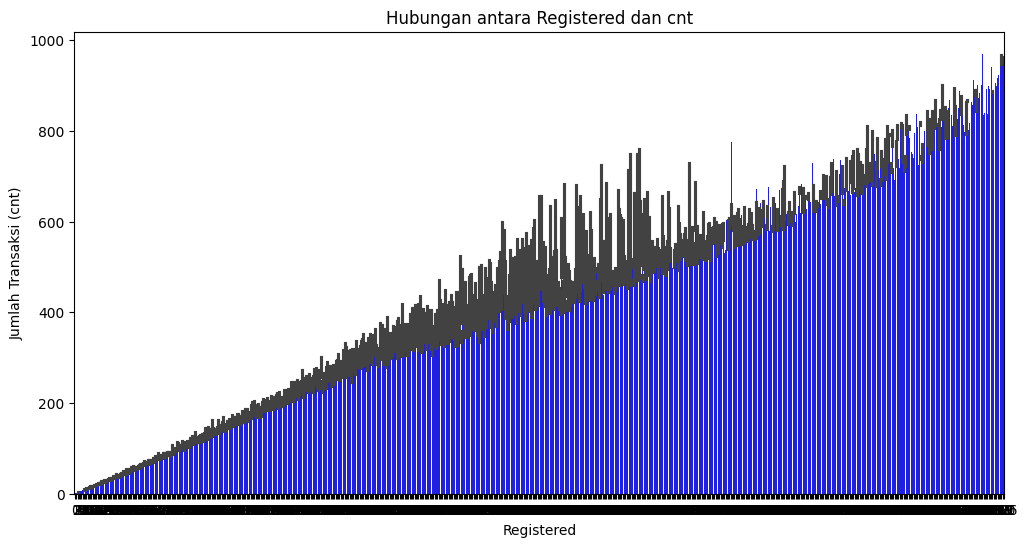

In [56]:
# Registered dan Cnt
plt.figure(figsize=(12, 6))

sns.barplot(x='registered', y='cnt', data=bike, color='b')
plt.title('Hubungan antara Registered dan cnt')
plt.xlabel('Registered')
plt.ylabel('Jumlah Transaksi (cnt)')

Semakin banyak yang menjadi member, semakin banyak juga rental sepeda

Text(0, 0.5, 'Jumlah Transaksi (cnt)')

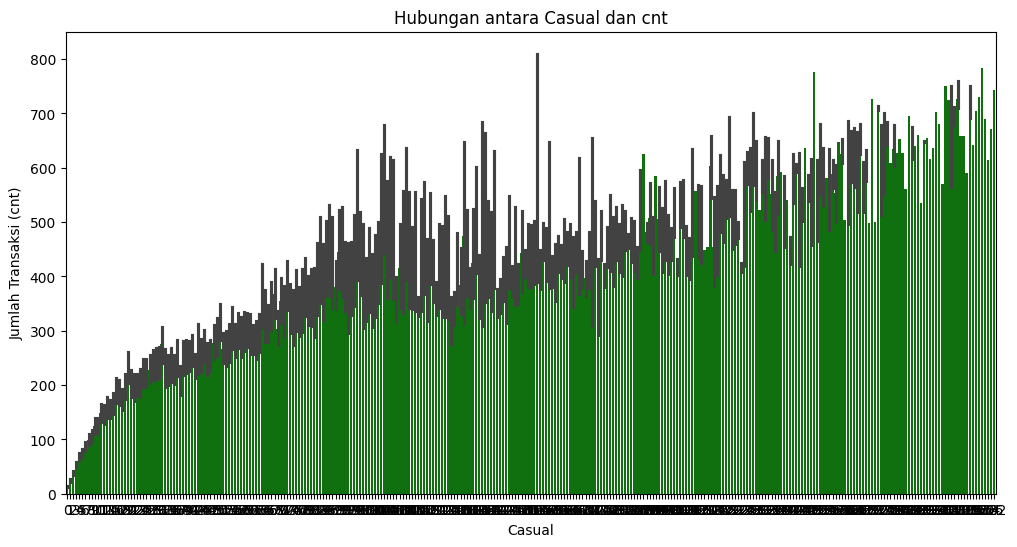

In [57]:
# Plot Hubungan antara 'casual' dan 'cnt'
plt.figure(figsize=(12, 6))

sns.barplot(x='casual', y='cnt', data=bike, color='g')
plt.title('Hubungan antara Casual dan cnt')
plt.xlabel('Casual')
plt.ylabel('Jumlah Transaksi (cnt)')

Semakin banyak pengguna casual, semakin banyak yang rental sepeda

Text(0, 0.5, 'Jumlah Transaksi (cnt)')

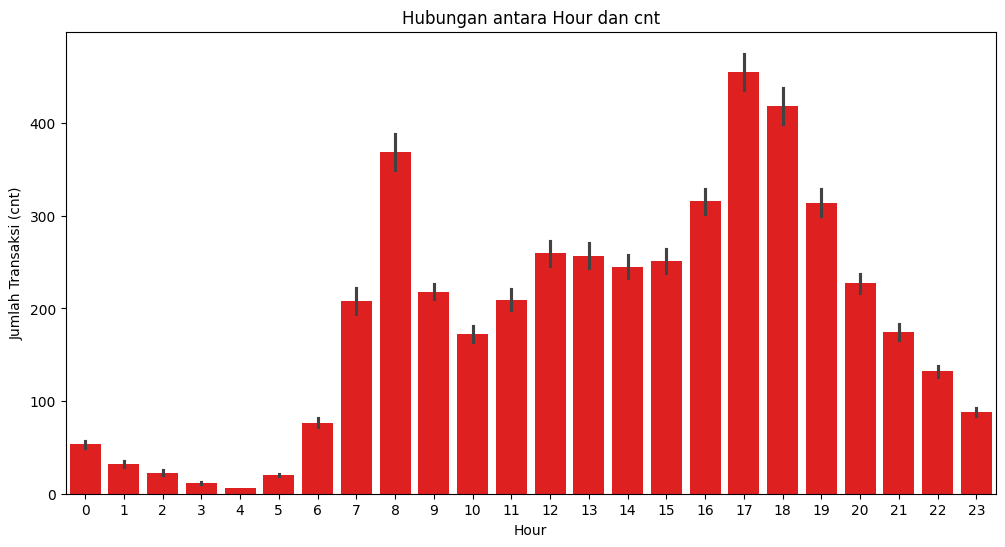

In [58]:
# Plot Hubungan antara 'hr' (hour) dan 'cnt'
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=bike, color='r')
plt.title('Hubungan antara Hour dan cnt')
plt.xlabel('Hour')
plt.ylabel('Jumlah Transaksi (cnt)')

In [64]:
max_transactions_row = bike.loc[bike['cnt'].idxmax()]
max_transactions_hr = max_transactions_row['hr']
max_transactions = max_transactions_row['cnt']
print(f"Durasi dengan transaksi paling tinggi adalah {max_transactions_hr} jam dengan {max_transactions} transaksi.")

Durasi dengan transaksi paling tinggi adalah 17 jam dengan 970 transaksi.


Text(0, 0.5, 'Jumlah Transaksi (cnt)')

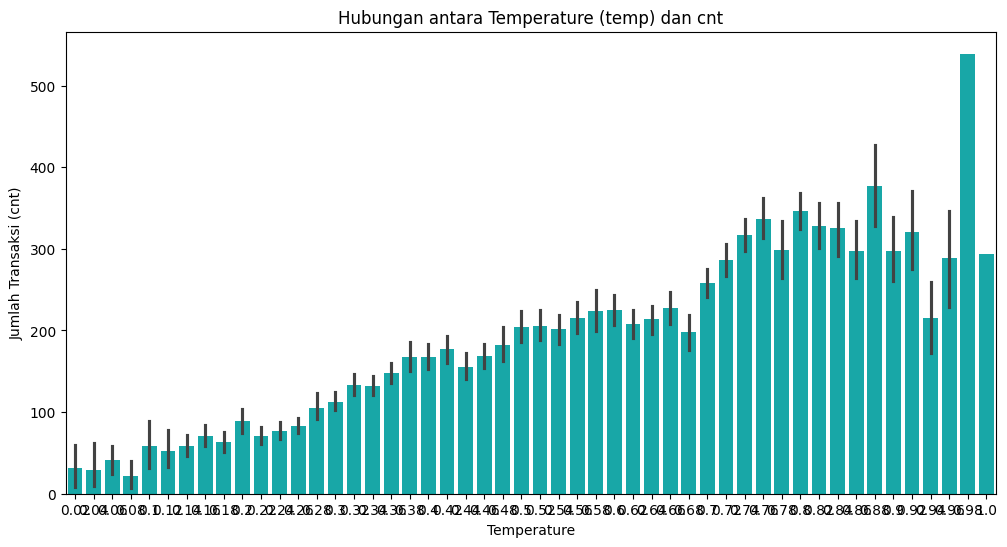

In [59]:
# Plot Hubungan antara 'temp' dan 'cnt'
plt.figure(figsize=(12, 6))
sns.barplot(x='temp', y='cnt', data=bike, color='c')
plt.title('Hubungan antara Temperature (temp) dan cnt')
plt.xlabel('Temperature')
plt.ylabel('Jumlah Transaksi (cnt)')

In [63]:
max_transactions_row = bike.loc[bike['cnt'].idxmax()]
max_transactions_temp = max_transactions_row['temp']
max_transactions = max_transactions_row['cnt']
print(f"Suhu dengan transaksi paling tinggi adalah {max_transactions_temp} dengan {max_transactions} transaksi.")

Suhu dengan transaksi paling tinggi adalah 0.7 dengan 970 transaksi.


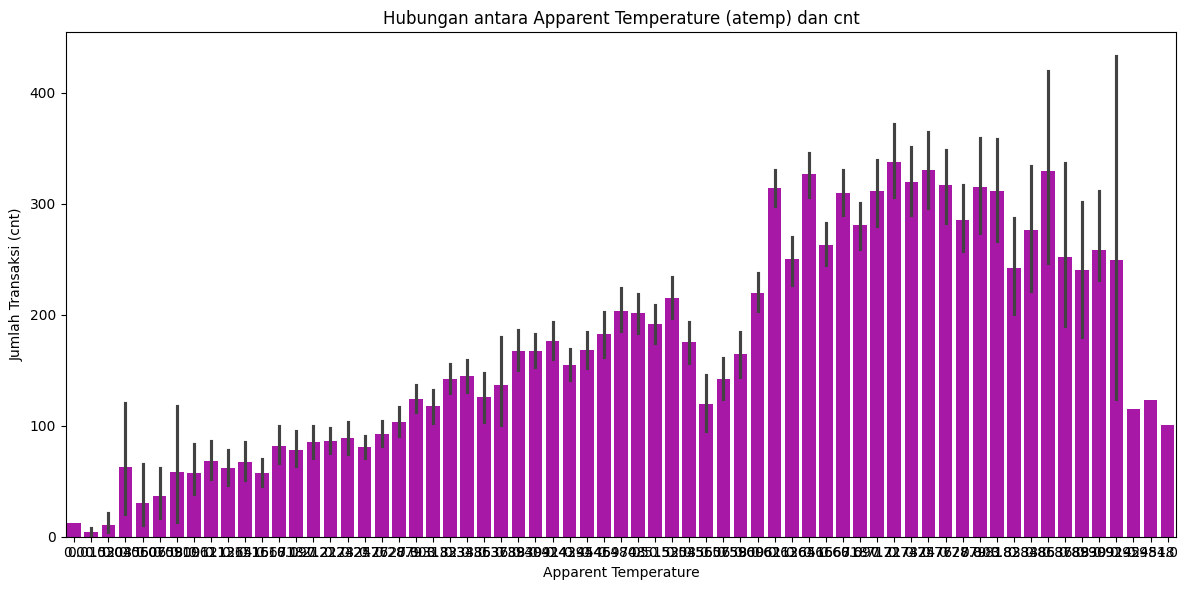

In [61]:
# Plot Hubungan antara 'atemp' dan 'cnt'
plt.figure(figsize=(12, 6))
sns.barplot(x='atemp', y='cnt', data=bike, color='m')
plt.title('Hubungan antara Apparent Temperature (atemp) dan cnt')
plt.xlabel('Apparent Temperature')
plt.ylabel('Jumlah Transaksi (cnt)')
plt.tight_layout()

In [62]:
max_transactions_row = bike.loc[bike['cnt'].idxmax()]
max_transactions_temp = max_transactions_row['atemp']
max_transactions = max_transactions_row['cnt']
print(f"Suhu dengan transaksi paling tinggi adalah {max_transactions_temp} dengan {max_transactions} transaksi.")

Suhu dengan transaksi paling tinggi adalah 0.6364 dengan 970 transaksi.


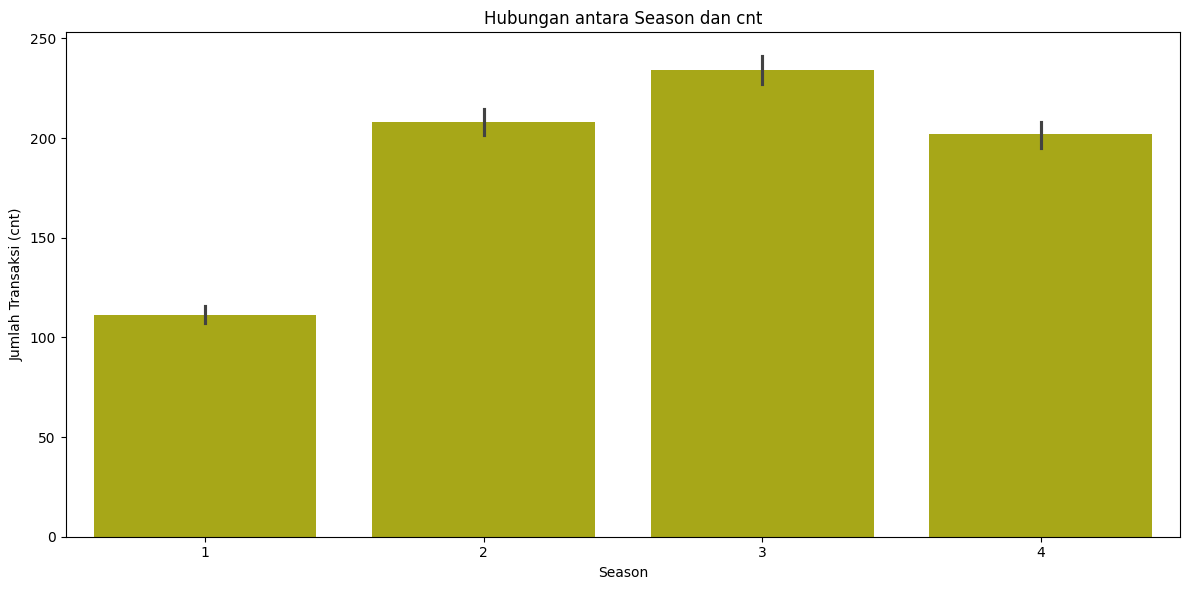

In [60]:
# Plot keenam: Hubungan antara 'season' dan 'cnt'
plt.figure(figsize=(12,6))
sns.barplot(x='season', y='cnt', data=bike, color='y')
plt.title('Hubungan antara Season dan cnt')
plt.xlabel('Season')
plt.ylabel('Jumlah Transaksi (cnt)')
plt.tight_layout()

Season dimana customer paling berminat untuk rental adalah season 3 (Light Snow)

**Modelling Data**

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
# Split Data

features = ['temp', 'atemp', 'casual', 'registered', 'hr', 'season']
X = bike[features]
y = bike['cnt'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Train Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
# Prediksi

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 2.914439150646019e-13
R²: 1.0


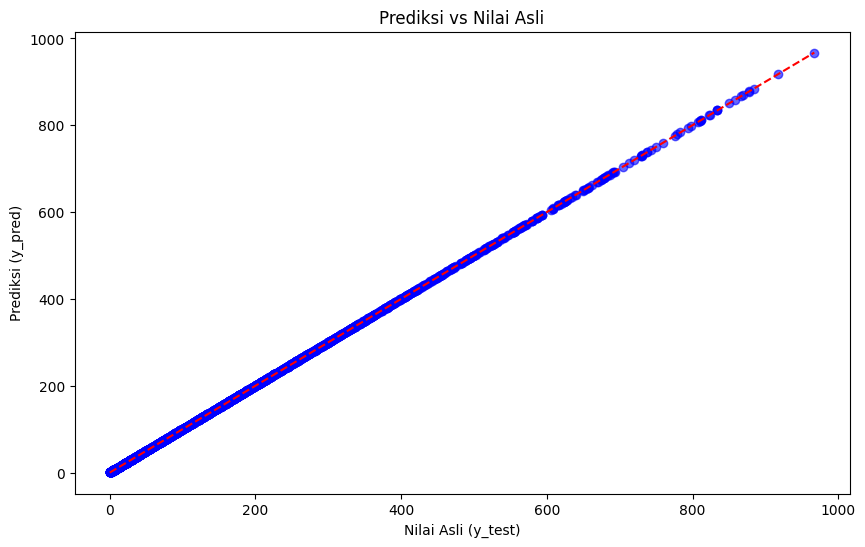

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Line of perfect fit
plt.title('Prediksi vs Nilai Asli')
plt.xlabel('Nilai Asli (y_test)')
plt.ylabel('Prediksi (y_pred)')
plt.show()

In [71]:
# Pengujian dengan Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_rf_pred))
rf_r2 = r2_score(y_test, y_rf_pred)
print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest R²: {rf_r2}')

Random Forest RMSE: 2.8162713226704432
Random Forest R²: 0.9997401562139426


In [72]:
# Menguji dengan cross validation

from sklearn.model_selection import cross_val_score

features = ['temp', 'atemp', 'casual', 'registered', 'hr', 'season']
X = bike[features]
y = bike['cnt']

linear_reg_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
linear_reg_cv_scores = cross_val_score(linear_reg_model, X, y, cv=5, scoring='r2')
rf_cv_scores = cross_val_score(random_forest_model, X, y, cv=5, scoring='r2')

print("Linear Regression R² scores:", linear_reg_cv_scores)
print("Average R² for Linear Regression:", linear_reg_cv_scores.mean())

print("Random Forest R² scores:", rf_cv_scores)
print("Average R² for Random Forest:", rf_cv_scores.mean())

Linear Regression R² scores: [1. 1. 1. 1. 1.]
Average R² for Linear Regression: 1.0
Random Forest R² scores: [0.99972775 0.99984513 0.99977351 0.99974745 0.99972275]
Average R² for Random Forest: 0.9997633186113969


In [73]:
# Menguji dengan MSE

from sklearn.metrics import make_scorer, mean_squared_error

mse_scorer = make_scorer(mean_squared_error)

linear_reg_cv_scores_mse = cross_val_score(linear_reg_model, X, y, cv=5, scoring=mse_scorer)

rf_cv_scores_mse = cross_val_score(random_forest_model, X, y, cv=5, scoring=mse_scorer)

print("Linear Regression MSE scores:", linear_reg_cv_scores_mse)
print("Average MSE for Linear Regression:", linear_reg_cv_scores_mse.mean())
print("Random Forest MSE scores:", rf_cv_scores_mse)
print("Average MSE for Random Forest:", rf_cv_scores_mse.mean())

Linear Regression MSE scores: [4.53475659e-27 7.31058957e-26 1.07351109e-25 5.97092577e-26
 4.28800943e-26]
Average MSE for Linear Regression: 5.751622263379884e-26
Random Forest MSE scores: [9.00985467 5.08306778 7.27110811 8.49790169 9.02527062]
Average MSE for Random Forest: 7.777440571632195


In [ ]:
# Cek dengan pipeline

X = bike.drop(columns=['count'])
y = bike['count']